In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


POLYNOMIAL With One Feature

In [19]:
x=df[['ENGINESIZE']].values
y=df[['CO2EMISSIONS']].values


In [20]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
x=norm.fit_transform(x)
y=norm.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
x_test.shape

(214, 1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)


In [23]:
from sklearn.linear_model import LinearRegression
Linear_Model=LinearRegression()
Linear_Model.fit(x_train_poly,y_train)

LinearRegression()

In [24]:
x_test_poly=poly.transform(x_test)
y_preds=Linear_Model.predict(x_test_poly)


In [25]:
from sklearn.metrics import r2_score ,  mean_squared_error
print(f"mean_squared_error: {mean_squared_error(y_test,y_preds)}")
print(f"r2_score: {r2_score(y_test,y_preds)}")

mean_squared_error: 0.2166137092963829
r2_score: 0.7466253595980197


In [27]:
w1,w2=Linear_Model.coef_[0,1],Linear_Model.coef_[0,2]
w0=Linear_Model.intercept_[0]

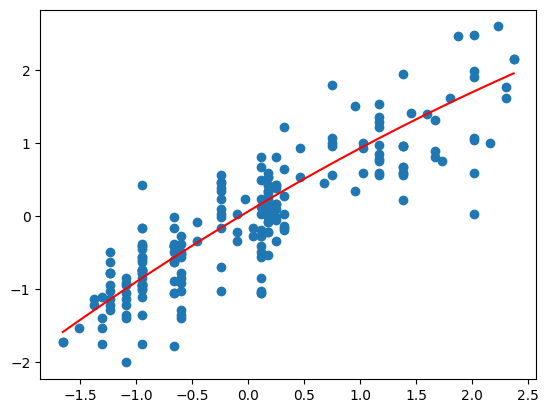

In [37]:
fig,ax=plt.subplots()
ax.scatter(x_test,y_test)
# ax.plot(X_test,pred)
# x=np.arange(-3,3,0.3)
x_plot=np.linspace(x_test.min(),x_test.max(),214)
x_plot=x_plot.reshape(-1,1)
# y_hat=w0+x*w1 +np.power(x,2)*w2+np.power(x,3)*w3
ax.plot(x_plot,Linear_Model.predict(poly.transform(x_plot)), color='red')
plt.show()

--------------------------------------------------------------------------------

POLYNOMIAL With Two Features

In [39]:
data=pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
x=df[['ENGINESIZE','FUELCONSUMPTION_CITY']].values
y=df[['CO2EMISSIONS']].values

In [41]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
x=norm.fit_transform(x)
y=norm.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)

In [44]:
from sklearn.linear_model import LinearRegression
Linear_Model=LinearRegression()
Linear_Model.fit(x_train_poly,y_train)

LinearRegression()

In [45]:
x_test_poly=poly.transform(x_test)
y_preds=Linear_Model.predict(x_test_poly)

In [46]:
from sklearn.metrics import r2_score ,  mean_squared_error
print(f"mean_squared_error: {mean_squared_error(y_test,y_preds)}")
print(f"r2_score: {r2_score(y_test,y_preds)}")

mean_squared_error: 0.10034312309063582
r2_score: 0.8694177984915329


In [48]:

feature_names = poly.get_feature_names_out(['ENGINESIZE', 'FUELCONSUMPTION_CITY'])
coefficients = Linear_Model.coef_[0]
intercept = Linear_Model.intercept_[0]
print("\nمدل نهایی:")
print(f"Intercept (w0): {intercept:.4f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")



مدل نهایی:
Intercept (w0): 0.1025
1: 0.0000
ENGINESIZE: 0.2946
FUELCONSUMPTION_CITY: 0.7813
ENGINESIZE^2: -0.1670
ENGINESIZE FUELCONSUMPTION_CITY: 0.4650
FUELCONSUMPTION_CITY^2: -0.3106


In [53]:
w1,w2,w3,w4,w5=Linear_Model.coef_[0,1],Linear_Model.coef_[0,2],Linear_Model.coef_[0,3],Linear_Model.coef_[0,4],Linear_Model.coef_[0,5]
w0=Linear_Model.intercept_[0]
print(f"w0:{w0}")
print(f"w1:{w1}")
print(f"w2:{w2}")
print(f"w3:{w3}")
print(f"w4:{w4}")
print(f"w5:{w5}")

w0:0.10250883024646143
w1:0.294564787794932
w2:0.781337846904899
w3:-0.16702416799648934
w4:0.46502704699906405
w5:-0.3106019763413842
